# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
       # print(city_lat)
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort st. john
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | vadso
Processing Record 6 of Set 1 | tulare
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | aykhal
Processing Record 9 of Set 1 | kakata
Processing Record 10 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | moissala
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | coxim
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | ad dilam
Processing Record 21 of Set 1 | stanley
Processing Record 22 o

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort st. john,56.2499,-120.8529,292.09,27,75,10.80,CA,1715286715
1,ushuaia,-54.8000,-68.3000,275.94,75,0,2.06,AR,1715286541
2,grytviken,-54.2811,-36.5092,271.92,83,100,1.41,GS,1715286804
3,west island,-12.1568,96.8225,300.14,83,100,5.66,CC,1715286804
4,vadso,70.0744,29.7487,273.24,69,40,7.20,NO,1715286805


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort st. john,56.2499,-120.8529,292.09,27,75,10.80,CA,1715286715
1,ushuaia,-54.8000,-68.3000,275.94,75,0,2.06,AR,1715286541
2,grytviken,-54.2811,-36.5092,271.92,83,100,1.41,GS,1715286804
3,west island,-12.1568,96.8225,300.14,83,100,5.66,CC,1715286804
4,vadso,70.0744,29.7487,273.24,69,40,7.20,NO,1715286805


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

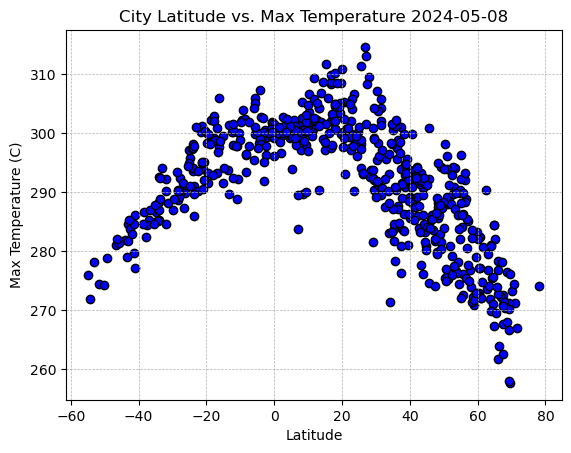

In [10]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y, color = "blue", edgecolor = "black", linewidth = 1)
plt.grid(True, linestyle = "--", linewidth = 0.5)

#  the other graph properties
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature (C)")
plt.title ("City Latitude vs. Max Temperature 2024-05-08")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

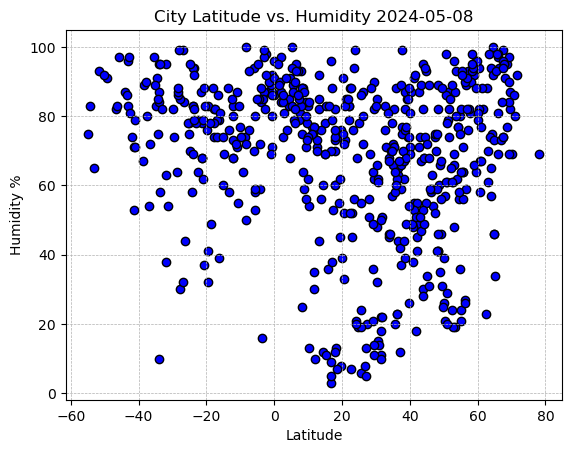

In [11]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y, color = "blue", edgecolor = "black", linewidth = 1)
plt.grid(True, linestyle = "--", linewidth = 0.5)

#  the other graph properties
plt.xlabel ("Latitude")
plt.ylabel ("Humidity %")
plt.title ("City Latitude vs. Humidity 2024-05-08")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

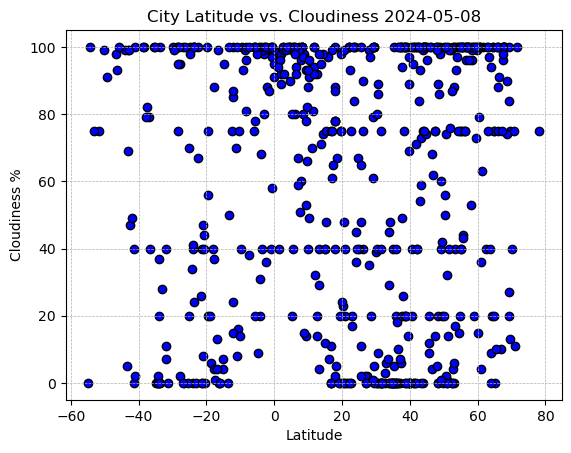

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y, color = "blue", edgecolor = "black", linewidth = 1)
plt.grid(True, linestyle = "--", linewidth = 0.5)

#  the other graph properties
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness %")
plt.title ("City Latitude vs. Cloudiness 2024-05-08")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

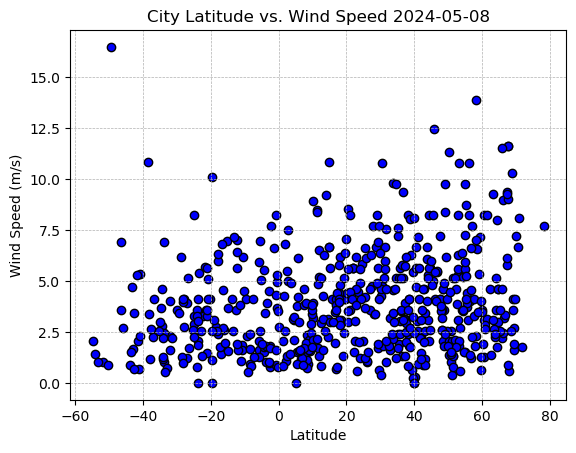

In [13]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y, color = "blue", edgecolor = "black", linewidth = 1)
plt.grid(True, linestyle = "--", linewidth = 0.5)

#  the other graph properties
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (m/s)")
plt.title ("City Latitude vs. Wind Speed 2024-05-08")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_data, y_data, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regression_line = slope * x_data + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure()
    plt.scatter(x_data, y_data, color='blue', alpha=0.6)

    plt.plot(x_data, regression_line, color='red', linewidth=2)
    plt.annotate(line_eq,(6,10),fontsize=18,color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value}")
    plt.tight_layout()
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort st. john,56.2499,-120.8529,292.09,27,75,10.80,CA,1715286715
4,vadso,70.0744,29.7487,273.24,69,40,7.20,NO,1715286805
5,tulare,36.2666,-118.8009,297.43,23,0,1.34,US,1715286806
7,aykhal,66.0000,111.5000,261.79,97,100,2.21,RU,1715286800
8,kakata,6.5300,-10.3517,300.64,95,94,1.18,LR,1715286807


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,275.94,75,0,2.06,AR,1715286541
2,grytviken,-54.2811,-36.5092,271.92,83,100,1.41,GS,1715286804
3,west island,-12.1568,96.8225,300.14,83,100,5.66,CC,1715286804
6,port elizabeth,-33.9180,25.5701,288.31,95,20,1.03,ZA,1715286806
11,port-aux-francais,-49.3500,70.2167,278.84,91,91,16.49,TF,1715286810


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8163904163342877


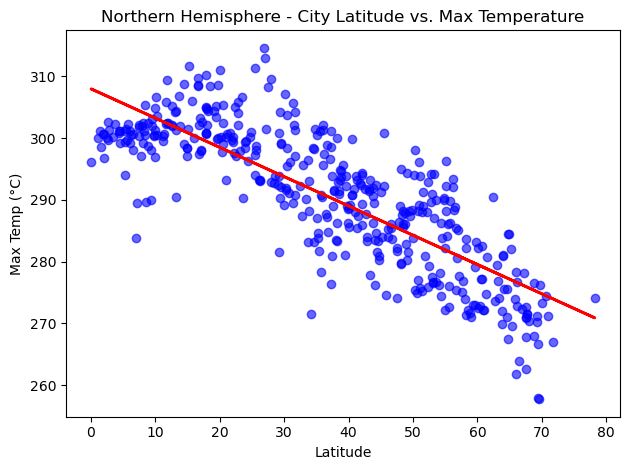

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temp (°C)', 'Northern Hemisphere - City Latitude vs. Max Temperature')

The r-value is: 0.8664703508592163


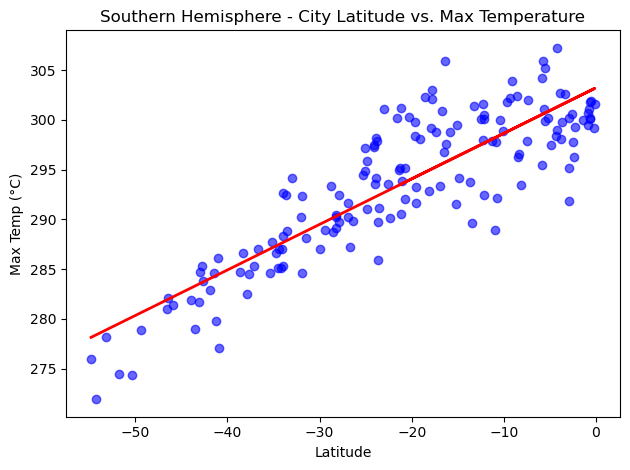

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temp (°C)', 'Southern Hemisphere - City Latitude vs. Max Temperature')

**Discussion about the linear relationship:** In the Northern Hemisphere there is not much 
of a correlation between the Max Temp and the Latitude. In the Southern Hemisphere, the 
warmer it gets there is a stronger correlation between the Max Temp and the Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0774694079912167


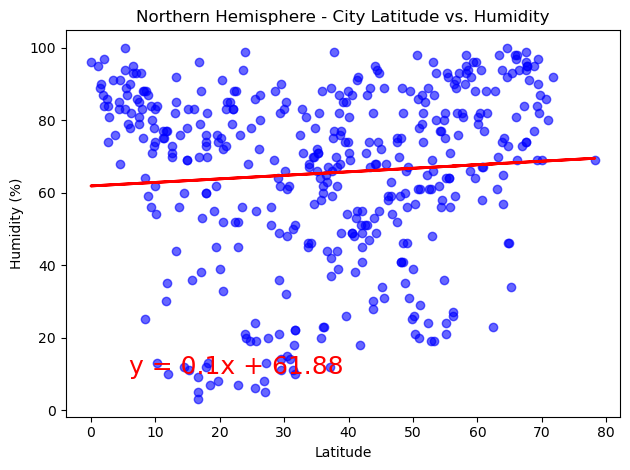

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity (%)', 'Northern Hemisphere - City Latitude vs. Humidity')

The r-value is: -0.023731278271008793


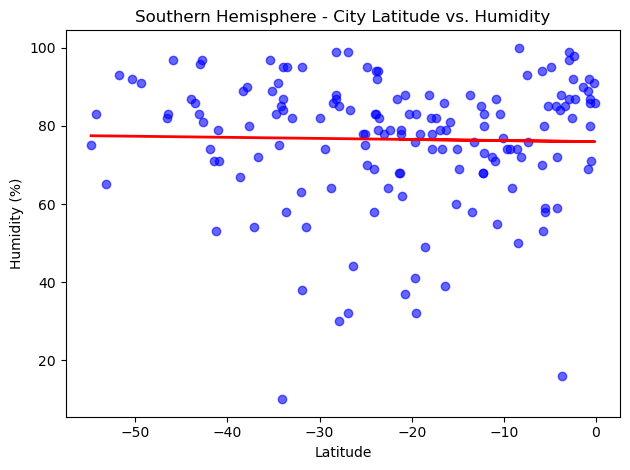

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity (%)', 'Southern Hemisphere - City Latitude vs. Humidity')

**Discussion about the linear relationship:** In the Southern Hemisphere, there is a strong 
correlation between the the latitude and Humidity. The warmer it gets, the more humid
it gets. In the North, it is more consistent but it does show that the North has moure humidity when it is warmer.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013490306542287387


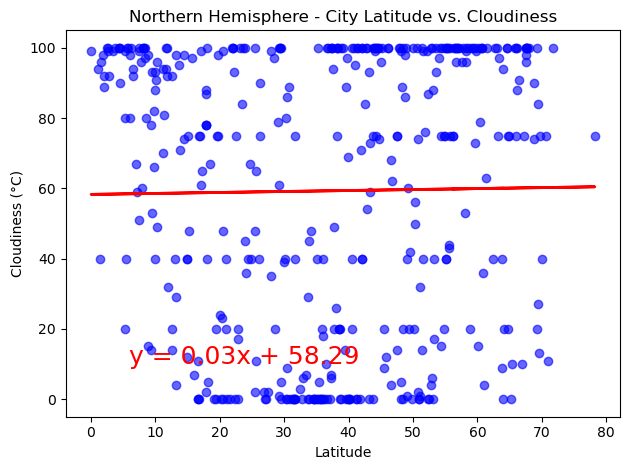

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness (°C)', 'Northern Hemisphere - City Latitude vs. Cloudiness')

The r-value is: 0.11159227441130432


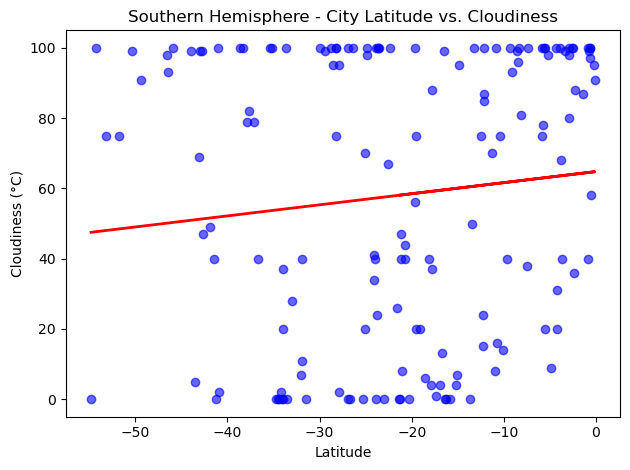

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness (°C)', 'Southern Hemisphere - City Latitude vs. Cloudiness')

**Discussion about the linear relationship:** There is really not much of a correlation 
between the latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.16973132076147793


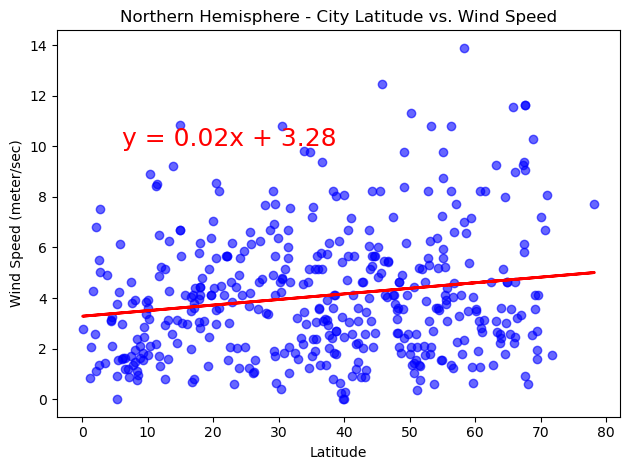

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed (meter/sec)', 'Northern Hemisphere - City Latitude vs. Wind Speed')

The r-value is: 0.013550431731311222


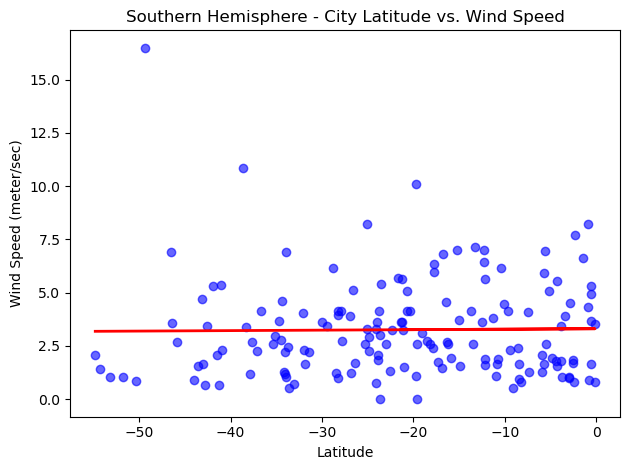

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed (meter/sec)', 'Southern Hemisphere - City Latitude vs. Wind Speed')

**Discussion about the linear relationship:**There is really not much of a correlation 
between the latitude and Wind Speed.